In [2]:
import pandas as pd
import numpy as np
import urllib, datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
# Note that rg = 250 grabs 250 records, the maximum number allowed
url = 'http://inspirehep.net/search?p=find t diphoton excess or 750 gev or refersto:recid:1410174 and de > 2015-12-15&sf=earliestdate&so=a&of=recjson&rg=350'
hypepapers = urllib.urlopen(url).read()
# Let's get a control sample which is all hep-ph papers in the same period
url = 'http://inspirehep.net/search?p=primarch hep-ph and de > 2015-12-15&sf=earliestdate&so=a&of=recjson&rg=350'
allpapers = urllib.urlopen(url).read()

In [91]:
dfhype = pd.read_json(hypepapers, orient='records')
dfall = pd.read_json(allpapers, orient='records')

In [92]:
# Make a column that cleans dates into good form
dfhype['date'] = dfhype.apply(lambda row: datetime.datetime.strptime(row['creation_date'],"%Y-%m-%dT%H:%M:%S"), axis=1)
dfall['date'] = dfall.apply(lambda row: datetime.datetime.strptime(row['creation_date'],"%Y-%m-%dT%H:%M:%S"), axis=1)

# Find the earliest and latest days
dday = min(min(dfhype.date),min(dfall.date))
latestday = max(dfhype.date)

# Make a column that is the number of days since the starting date 
dfhype['days_since_release'] = dfhype.apply(lambda row: (row['date'] - dday).days, axis = 1)
dfall['days_since_release'] = dfall.apply(lambda row: (row['date'] - dday).days, axis = 1)

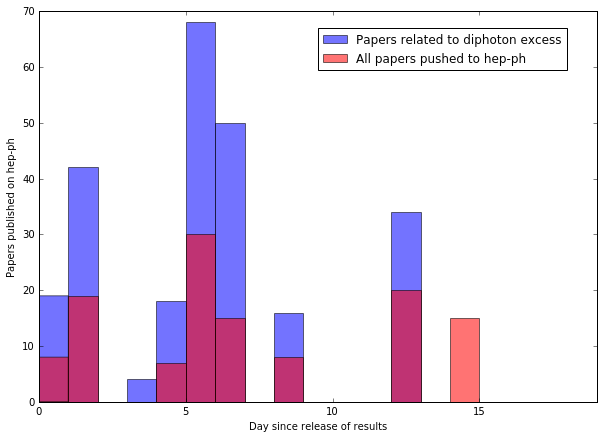

In [102]:
f, a = plt.subplots()
days_elapsed = (latestday-dday).days
f.set_size_inches(10,7)
hype_counts = dfhype.days_since_release.groupby(dfhype.days_since_release).count()
all_counts = dfall.days_since_release.groupby(dfall.days_since_release).count()
ind = np.arange(days_elapsed)
all_plot = a.hist(np.asarray(dfall.days_since_release), bins=np.arange(days_elapsed), color='b', alpha=0.55)
hype_plot = a.hist(np.asarray(dfhype.days_since_release), bins=np.arange(days_elapsed), color='r', alpha=0.55)
a.set_xlim(0,days_elapsed)
a.set_xlabel('Day since release of results')
a.set_ylabel('Papers published on hep-ph')
a.legend(('Papers related to diphoton excess','All papers pushed to hep-ph'), loc=(.5,.85))

In [94]:
dfhype.number_of_citations.value_counts()

0     15
36     6
3      6
9      6
4      6
34     6
10     5
24     4
75     4
43     4
35     3
71     3
25     3
2      3
23     3
41     3
42     3
47     2
31     2
94     2
11     2
49     2
62     2
65     2
8      2
7      2
77     2
6      2
5      2
85     2
29     2
21     1
12     1
27     1
22     1
98     1
28     1
30     1
92     1
90     1
84     1
82     1
78     1
76     1
74     1
70     1
69     1
55     1
52     1
45     1
40     1
39     1
37     1
38     1
Name: number_of_citations, dtype: int64

In [95]:
dfhype[dfhype.authors.str.contains("Rattazzi")]

KeyError: '[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan\n  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan\n  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan\n  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan\n  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan\n  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan\n  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan\n  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan\n  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan] not in index'

In [100]:
dfhype.columns.values

array([u'FIXME_OAI', u'abstract', u'authors', u'collection', u'comment',
       u'creation_date', u'filenames', u'files', u'filetypes', u'license',
       u'number_of_authors', u'number_of_citations', u'number_of_comments',
       u'number_of_reviews', u'persistent_identifiers_keys',
       u'physical_description', u'prepublication',
       u'primary_report_number', u'recid', u'reference',
       u'source_of_acquisition', u'subject', u'system_control_number',
       u'thesaurus_terms', u'title', u'title_additional', u'version_id',
       'date', 'days_since_release'], dtype=object)

In [38]:
dfhype[dfhype.thesaurus_terms.notnull()].loc[0:,['thesaurus_terms','number_of_citations']].sort(['number_of_citations'], ascending=False)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,thesaurus_terms,number_of_citations
127,"[{u'term': u'* Automatic Keywords *'}, {u'inst...",89
132,"[{u'term': u'* Automatic Keywords *'}, {u'inst...",87
126,"[{u'term': u'* Automatic Keywords *'}, {u'inst...",87
130,"[{u'term': u'* Automatic Keywords *'}, {u'inst...",83
125,"[{u'term': u'* Automatic Keywords *'}, {u'inst...",83
131,"[{u'term': u'* Automatic Keywords *'}, {u'inst...",80
129,"[{u'term': u'* Automatic Keywords *'}, {u'inst...",80
128,"[{u'term': u'* Automatic Keywords *'}, {u'inst...",76
108,"[{u'term': u'* Automatic Keywords *'}, {u'inst...",75
111,"[{u'term': u'* Automatic Keywords *'}, {u'inst...",70


In [78]:
hype_counts = dfhype.days_since_release.groupby(dfhype.days_since_release).count()
all_counts = dfall.days_since_release.groupby(dfall.days_since_release).count()
print hype_counts
print all_counts

days_since_release
0     18
2      7
3      2
4     28
5     15
6      8
10    20
12    14
13     1
17     2
18    10
dtype: int64
days_since_release
-1      5
 0     28
 2     22
 3      6
 4     62
 5     50
 6     16
 10    43
 12    19
dtype: int64


In [ ]:
# Idea: look at citation binging just after higgs hint in 2011 
# (this search seems to do it, but there are many fewer records in the same time span, hmmmm)
# (might need to change ending date, it includes a bunch of theses)
# url = 'http://inspirehep.net/search?p=find t 125 or find t 126 or find t higgs or refersto:recid:1204219 or refersto:recid:1260660 aund de > 2011-12-11 and de < 2012-03-04&of=recjson&rg=250'

# Further, we could find the uproar after doing the same thing for the ACTUAL Higgs discovery, which we can find with this search
# url = 'http://inspirehep.net/search?p=refersto:recid:1124338 or refersto:recid:1124337 and de > 2012-07-04 and de < 2012-09-04&of=recjson&rg=250'

# alternatively, we could clock each to see how long each takes 
# to get to 100 papers on said topic, and compare that time